Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     prism, center = (0,0,0)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-0.2,-0.057735,-5e+19)
          (0,0.11547,-5e+19)
          (0.2,-0.057735,-5e+19)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.46666

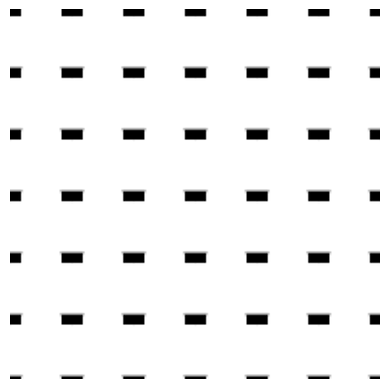

epsilon: 1-6.1504, mean 1.29961, harm. mean 1.0569, 6.93359% > 1, 5.8172% "fill"
real part range: 1 .. 6.1504


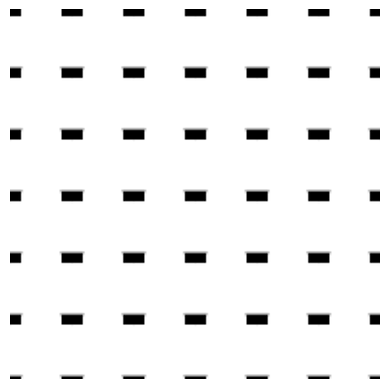

In [1]:
# we first use the function mp.cartesian_to_lattice to transform the coordinates

import math

import meep as mp
from meep import mpb
import numpy as np
# A triangular lattice of dielectric rods in air.  (This structure has
# a band_gap for TM fields.)  This file is used in the "Data Analysis
# Tutorial" section of the MPB manual.

num_bands = 8


nslab = 2.48
slab = mp.Medium(index=nslab)


# # Lattice geometry I
# geometry_lattice = mp.Lattice(
#     size=mp.Vector3(1, 1),
#     basis2=mp.Vector3(0.5,math.sqrt(3) / 2),
#     basis1=mp.Vector3(1, 0),
# )

# Lattice geometry II
geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1),
    basis2=mp.Vector3(0,1),
    basis1=mp.Vector3(1, 0),
)

# (1) For squares in cartesian coordinates
# s=0.125
# vertices1 = [mp.Vector3(-1*s,-1*s),
#              mp.Vector3(-1*s,1*s),
#              mp.Vector3(s*1,s*1),
#              mp.Vector3(1*s,-1*s)]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab)]



#(2) For squares in Lattice coordinates method 1
# s=0.125
# vertices1 = [mp.cartesian_to_lattice(mp.Vector3(-1*s,-1*s),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(-1*s,1*s),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(s*1,s*1),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(1*s,-1*s),geometry_lattice)]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab)]

# # (3) For squares in Lattice coordinates method 2
# s=0.125
# geometry=[mp.Block(mp.Vector3(0.25,0.25),center=mp.Vector3(0,0), material=slab)]

# #(4) For squares in Lattice coordinates method 2
# s=0.125
# geometry=[mp.Block(mp.Vector3(0.25,0.25),center=mp.Vector3(0,0), material=slab,
#                   e1 = mp.cartesian_to_lattice(mp.Vector3(1,0,0), geometry_lattice),
#                   e2 = mp.cartesian_to_lattice(mp.Vector3(0,1,0), geometry_lattice))]

# # #(5) For squares in Lattice coordinates method 3
# s=0.2
# vertices1 = [mp.Vector3(0*s,0*s),
#              mp.Vector3(1*s,0*s),
#              mp.Vector3(s*3/2,s*np.sqrt(3)/2),
#              mp.Vector3(s*1/2,s*np.sqrt(3)/2),]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab,axis=mp.Vector3(0,0,1))]

# # #(5) For triangle in Lattice coordinates
s1=0.2
vertices1 = [mp.Vector3(-1*s1,0),
            mp.Vector3(0*s1,math.sqrt(3)/2*s1),
            mp.Vector3(1*s1,0),]
geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab,axis=mp.Vector3(0,0,1))]

# 注意倒格矢空间
k_points = [
    mp.Vector3(),  # Gamma
    mp.Vector3(y=0.5),  # M
    mp.Vector3(1 / -3, 1 / 3),  # K
    mp.Vector3(),  # Gamma
]

k_points = mp.interpolate(4, k_points)

resolution = 32

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
)

ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

import matplotlib.pyplot as plt
md = mpb.MPBData(rectify=False, periods=6, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

md = mpb.MPBData(rectify=True, periods=6, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()